In [2]:
from qiskit import *
from math import *
from qiskit.visualization import *
import numpy as np
import matplotlib as plt

#need to create bell pair of |01> and |10>

In [3]:
#Defining functions to be used for Gradient Descent algorithm


def deriv(x, case):
    
    '''
    Description: This function takes in a value of x and returns its derivative based on the 
    initial function we specified.
    
    Arguments:
    x - a numerical value of x 
    case - to check for which gate it's being called for 
    
    Returns:
    x_deriv - a numerical value of the derivative of x
    
    '''
    if case == 'RY':
        x_deriv = 2* (x) - np.pi        #for RY Gate
        
    elif case == 'RX':
        x_deriv = 2* (x) - 2* (np.pi)   #for RX Gate
    
    return x_deriv
    
    

def step(x_new, x_prev, precision, l_r, case):
    
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    x_new - a starting value of x that will get updated based on the learning rate
    x_prev - the previous value of x that is getting updated to the new one
    precision - a precision that determines the stop of the stepwise descent 
    l_r - the learning rate (size of each descent step)
    
    Output:
    x_new - minimum value obtianed after after gradient descent
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    
    x_list, y_list = [x_new], [function(x_new)]
    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
        
        # change the value of x
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x = - deriv(x_prev, case)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (l_r * d_x)
        

    '''    
    Prints the minimum values obtained
    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    '''
    return x_new

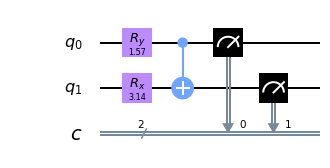

In [4]:
#initialize a 2 qubit circuit with 2 classical bits
qc = QuantumCircuit(2,2)

##apply H gate to first qubit which is same as RY with theta=pi/2

#Gradient Descent algorithm for RY Gate where 
function = lambda x: (x ** 2)-(np.pi *(x))+(((np.pi) ** 2)/4)
theta_ry = step(0.5, 0, 0.000001, 0.05, case = 'RY')

#RY on qubit_0
qc.ry(theta_ry, 0)

##apply X gate to second qubit which is same as RX with theta=pi

#Gradient Descent algorithm for RX Gate
function = lambda x: (x ** 2)-(np.pi *(x) *2)+((np.pi) ** 2) 
theta_rx = step(0.5, 0, 0.000001, 0.05, case = 'RX')

#RX on qubit_1
qc.rx(theta_rx, 1)

#apply CNOT gate to convert into Bell States
qc.cx(0,1)


qc.measure([0,1],[0,1])

#Draw the resulting circuit
qc.draw(output='mpl')

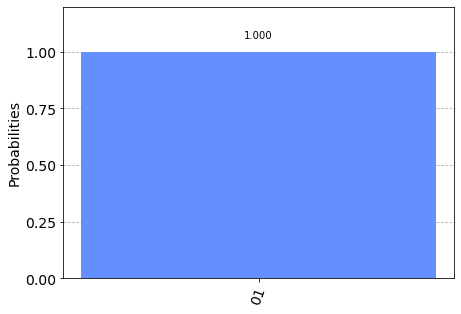

In [36]:
#result
backend = Aer.get_backend('qasm_simulator')
final_state = execute(qc, backend, shots = 1).result()
counts = final_state.get_counts()
plot_histogram(counts)